In [ ]:
# 라이브러리 import 모음
import pandas as pd      # 데이터 처리 및 분석
import numpy as np       # 수치 계산
import matplotlib.pyplot as plt   # 시각화
import seaborn as sns    # 통계적 시각화

plt.rcParams['font.family'] = 'AppleGothic'

%matplotlib inline

In [2]:
# 라이브러리 import 모음
import pandas as pd      # 데이터 처리 및 분석

# 1. `StudentsPerformance.csv`를 DataFrame으로 로드
df = pd.read_csv('../data/StudentsPerformance.csv')

## BASIC ⭐

### 문제 1 : 데이터 로딩 & 구조 확인하기

#### **문제 설명**

CSV를 DataFrame으로 로드한 뒤 구조를 빠르게 진단합니다. 분석의 첫 단계입니다.

#### **필요 지식**

`pd.read_csv`, `DataFrame.shape`, `DataFrame.info`, `DataFrame.head`

#### **지시 사항**

1. `StudentsPerformance.csv`를 DataFrame으로 로드
2. 행·열 수와 컬럼별 dtype/info 출력
3. 상위 5행 출력

#### **시각화 요구**

(없음)

#### **채점 포인트**

- 파일 로딩 코드 정확성
- `.shape`, `.info()`, `.head()` 출력 여부

In [9]:
# 라이브러리 import
import pandas as pd

# 1. `StudentsPerformance.csv`를 DataFrame으로 로드
df = pd.read_csv('../data/StudentsPerformance.csv')

# 2. 행·열 수와 컬럼별 dtype/info 출력
print(df.shape)
print('-------------------------------------------------------')
print(df.dtypes)
print('-------------------------------------------------------')
print(df.info())
print('-------------------------------------------------------')

# 3. 상위 5행 출력
df.head()

(1000, 8)
-------------------------------------------------------
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object
-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 문제 2 : 결측치 & 중복 점검하기

#### **문제 설명**

데이터 품질 확인을 위해 결측치와 중복 행을 점검합니다.

#### **필요 지식**

`DataFrame.isna().sum`, `DataFrame.duplicated`, `DataFrame.drop_duplicates`

#### **지시 사항**

1. 컬럼별 결측치 개수 출력
2. 중복 행 개수 출력
3. 중복 제거 후 현재 행 수 출력

#### **시각화 요구**

(없음)

#### **채점 포인트**

- 결측/중복 점검 코드 유무
- 중복 제거 후 변화 확인

In [5]:
# 라이브러리 import 모음
import pandas as pd      # 데이터 처리 및 분석

# 1. 컬럼별 결측치 개수 출력
# print(df.info())
print(df.isna().sum())
print('-------------------------------------------------------')

# 2. 중복 행 개수 출력
print(df.duplicated().sum())
print('-------------------------------------------------------')

# 3. 중복 제거 후 현재 행 수 출력
print(df.drop_duplicates().count())
print('-------------------------------------------------------')
print(df.shape)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
-------------------------------------------------------
0
-------------------------------------------------------
gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
dtype: int64
-------------------------------------------------------
(1000, 8)


### 문제 3 : 단일 히스토그램 - 수학 점수 분포 확인하기

#### **문제 설명**

수학 점수 컬럼의 분포 모양을 히스토그램으로 확인합니다.

#### **필요 지식**

`plt.hist` 또는 `Series.hist`, bin 개수 설정, 축 라벨/제목

#### **지시 사항**

1. `math score`에 대해 **bins=20**으로 히스토그램
2. 제목/축 라벨 설정

#### **시각화 요구**

- 단일 히스토그램 1개
- 보기 좋게 `tight_layout()`

#### **채점 포인트**

- bin 수 적용
- 제목/축 라벨 명시
- 단일 그래프 사용

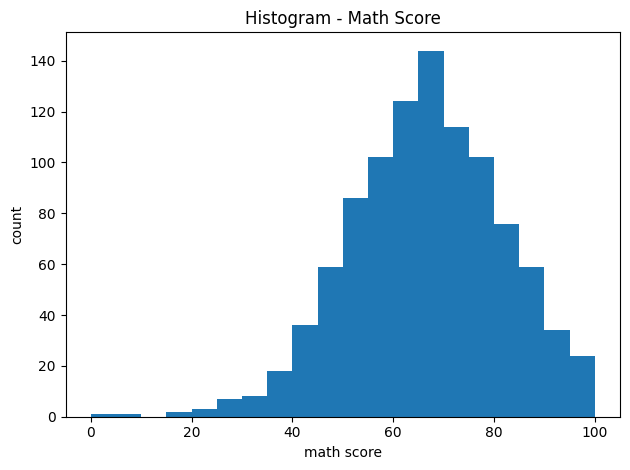

In [ ]:
# 라이브러리 import
import pandas as pd      # 데이터 처리 및 분석
import matplotlib.pyplot as plt     # 시각화

# 1. `math score`에 대해 **bins=20**으로 히스토그램
plt.hist(df['math score'], bins = 20)

# 2. 제목/축 라벨 설정
plt.title('Histogram - Math Score')
plt.xlabel('math score')
plt.ylabel('count')
plt.tight_layout()

plt.show()

## INTERMEDIATE ⭐⭐

### 문제 4 : 세 과목 모두 80점 이상 → 성별 분포 단일 막대그래프로 나타내기

#### **문제 설명**

고득점자 집단(세 과목 모두 80점 이상)을 추출해 성별 분포를 확인합니다.

#### **필요 지식**

다중 조건 마스크, `Series.value_counts`, 단일 막대그래프

#### **지시 사항**

1. `math score` ≥ 80 & `reading score` ≥ 80 & `writing score` ≥ 80 필터
2. 필터 결과의 `gender` 빈도 출력
3. 빈도를 **단일 막대그래프**로 시각화

#### **시각화 요구**

- 한 그림에 성별 2막대
- 제목/축 라벨 설정

#### **채점 포인트**

- 다중 조건 정확성
- `value_counts()` 활용
- 단일 그래프 사용

gender
female    72
male      49
Name: count, dtype: int64


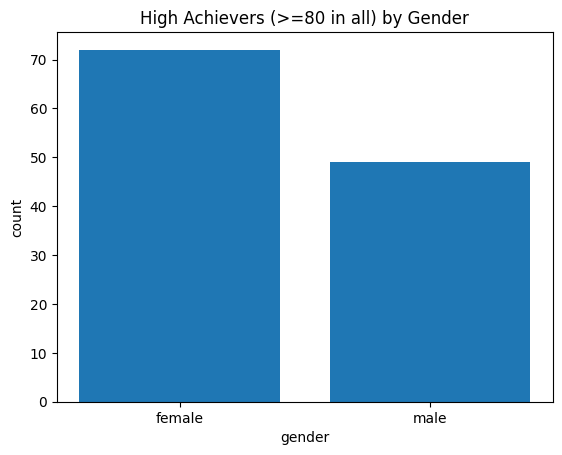

In [ ]:
# 라이브러리 import
import pandas as pd      # 데이터 처리 및 분석
import matplotlib.pyplot as plt     # 시각화

# 1. `math score` ≥ 80 & `reading score` ≥ 80 & `writing score` ≥ 80 필터
high_df = df[(df['math score']>=80) & (df['reading score']>=80) & (df['writing score']>=80)]

# 2. 필터 결과의 `gender` 빈도 출력
# - 각 타입별 개수 세기 : value_counts()
cnt = high_df['gender'].value_counts()
print(cnt)

# 3. 빈도를 단일 막대그래프로 시각화
plt.bar(cnt.index, cnt)
plt.title('High Achievers (>=80 in all) by Gender')
plt.xlabel('gender')
plt.ylabel('count')

plt.show()

### 문제 5 : 시험 준비 완료 & 일반 점심의 평균 점수를 막대그래프로 나타내기

#### **문제 설명**

두 조건을 동시에 만족하는 학생만 추출해, 세 과목 평균을 비교합니다. 

#### **필요 지식**

불리언 마스크(`&`), `DataFrame.loc`, `DataFrame.mean`, 반올림(`Series.round`), 단일 막대 그래프

#### **지시 사항**

1. **AND** 필터를 사용해서 조건 결합
2. `math/reading/writing score` 평균을 **소수점 1자리**로 출력
3. 평균 3개를 **단일 막대그래프**로 시각화(한 그림)

#### **시각화 요구**

- 한 그림에 막대 3개
- 제목/축 라벨 설정, y축 [0,100] 권장 → `plt.ylim`

#### **채점 포인트**

- 조건 결합(AND) 정확성
- 평균/반올림 적용
- 단일 그래프 사용

In [ ]:
filtered_df = df[(df['test preparation course'] == "completed") & (df['lunch'] == "standard")]
total_avg = filtered_df[['math score', 'reading score', 'writing score']].mean().round(1)

math score       73.5
reading score    76.2
writing score    76.8
dtype: float64


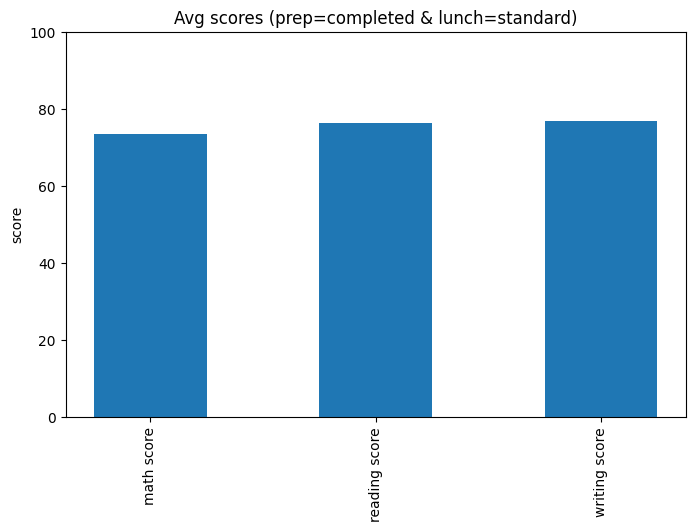

In [ ]:
# 라이브러리 import
import pandas as pd      # 데이터 처리 및 분석
import matplotlib.pyplot as plt     # 시각화

# 1. AND 필터를 사용해서 조건 결합
# 조건 : test preparation course == completed & lunch == standard
filtered_df = df.loc[(df['test preparation course'] == "completed") & (df['lunch'] == "standard"), ['math score', 'reading score', 'writing score']]

# # 2. 세 과목(math/reading/writing score) 평균을 소수점 1자리로 출력
total_avg = filtered_df.mean().round(1)
print(total_avg)

# 3. 평균 3개를 단일 막대그래프로 시각화(한 그림)
plt.figure(figsize=(8,5))
plt.bar(total_avg.index, total_avg, width=0.5)
plt.title('Avg scores (prep=completed & lunch=standard)')
plt.xticks(rotation=90)
plt.ylabel('score')
plt.ylim(0,100)

plt.show()

### 문제 6 : 부모 학력별 수학 평균 단일 산점도로 나타내기

#### **문제 설명**

범주형 변수 **부모 학력별**을 나타내는 컬럼별 **수학 점수 평균**을 계산해, **단일 산점도**로 평균값을 비교해 보세요.

평균이 높은 순으로 **정렬된 카테고리 순서**로 표시하면, 어떤 학력군에서 수학 평균이 높은지 한눈에 볼 수 있습니다.

> 참고: 범주 간 연결선은 의미가 불분명할 수 있어 점만 표시합니다(선 연결 X).
> 

#### **필요 지식**

- `groupby(...).mean()`로 범주별 평균 계산
- `Series.sort_values()`로 내림차순 정렬
- **Seaborn `scatterplot`** 또는 **Matplotlib `plt.scatter`** 기본 사용
- 축 레이블, 제목, x축 라벨 회전, `ylim` 등 기본 서식

#### **지시 사항**

1. `parental level of education`별 평균 `math score`를 계산하고 **소수점 1자리**로 반올림해 표로 출력하세요.
2. 평균값을 **내림차순**으로 정렬한 **카테고리 순서(order)**를 만드세요.
3. 단일 그래프(1개)로 **산점도**를 그리세요.
- x축: `parental level of education` (정렬된 순서 적용)
- y축: `math score`의 평균
- **점만 표시**(선 연결 X)
- 제목/축 라벨 지정, x축 라벨 회전(예: 30°)
- y축 범위는 `0~100` 권장

#### **시각화 요구**

- 그래프 **1개** (서브플롯/여러 차트 금지)
- 루프(`for p in ax.patches:` 등) 사용 금지
- 제목/축 라벨/라벨 회전/축 범위 정리

#### **채점 포인트**

- 평균 계산 및 **내림차순 정렬**이 정확한가?
- 산점도에 **정렬된 order**가 반영되었는가?
- 단일 그래프 요건을 지켰는가? (선 연결 없음)
- 기본 서식(제목/축 라벨/회전/축 범위)을 적용했는가?

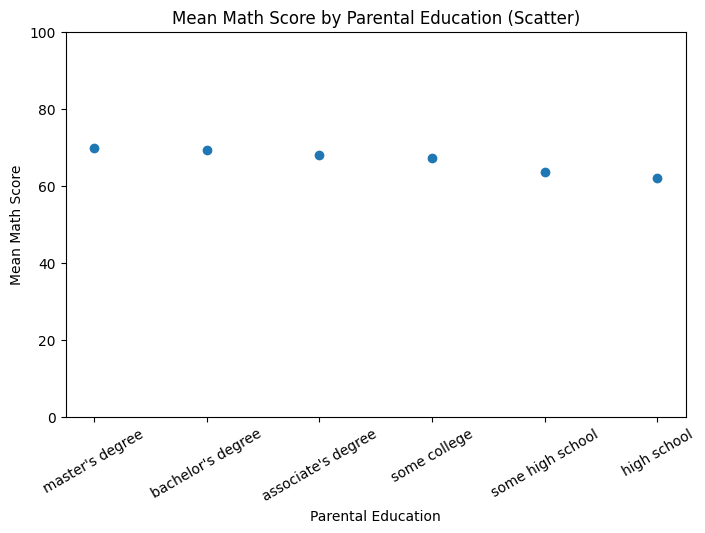

In [ ]:
# 라이브러리 import
import pandas as pd      # 데이터 처리 및 분석
import matplotlib.pyplot as plt     # 시각화

# 1. `parental level of education`별 평균 `math score`를 계산하고 소수점 1자리로 반올림해 표로 출력하세요.
math_avg_level = df.groupby('parental level of education')['math score'].mean().round(1)
#print(math_avg_level)

# 2. 평균값을 **내림차순**으로 정렬한 **카테고리 순서(order)**를 만드세요.
order = math_avg_level.sort_values(ascending=False)

# 3. 단일 그래프(1개)로 산점도를 그리세요.
# - x축: `parental level of education` (정렬된 순서 적용)
# - y축: `math score`의 평균
# - 점만 표시(선 연결 X)
# - 제목/축 라벨 지정, x축 라벨 회전(예: 30°)
# - y축 범위는 `0~100` 권장
plt.figure(figsize=(8,5))
plt.scatter(order.index, order)
plt.title('Mean Math Score by Parental Education (Scatter)')
plt.xlabel('Parental Education')
plt.xticks(rotation=30)
plt.ylabel('Mean Math Score')
plt.ylim(0,100)

plt.show()

## CHALLENGE ⭐⭐⭐

### 문제 7 : 부모 학력 수준별 고득점 비율(%) 계산 & 단일 막대그래프로 나타내기

#### **문제 설명**

세 과목(수학, 읽기, 쓰기)이 **모두 80점 이상**인 “고득점자” 비율을 **부모 학력 수준별**로 계산해 비교합니다.

단순 평균이 아니라 비율(= 고득점자 수 / 전체 수 × 100)을 계산해야 하므로, 그룹별 분모·분자를 정확히 맞춰 계산하는 것이 핵심입니다.

#### **필요 지식**

- 불리언 필터(다중 조건 AND)
- `groupby(...).size()`로 **그룹별 건수** 계산
- 인덱스 정렬·정렬 순서 유지(`reindex`)
- `Series` 간 연산으로 **비율** 계산, `fillna(0)`, 반올림
- 단일 **bar plot** (Matplotlib 또는 pandas `.plot(kind='bar')`)

#### **지시 사항**

1. “고득점자” 필터: 세 과목이 모두 **≥ 80**
2. 부모 학력 수준별 **전체 학생 수**(분모)와 **고득점자 수**(분자) 계산
3. **비율(%)** = (분자 / 분모) × 100 → **소수점 1자리** 반올림
4. **내림차순**으로 정렬 후 **단일 막대그래프** 1개로 시각화 (y축 0~100 권장)

#### **시각화 요구**

- 그래프 1개(서브플롯 X)
- 제목/축 라벨 설정, x라벨 회전(필요 시)

#### **채점 포인트**

- 분모/분자 계산을 **같은 그룹 축**으로 정확히 맞췄는가?
- 결측 그룹을 `fillna(0)` 등으로 적절히 처리했는가?
- 비율(%)을 소수점 1자리로 명시했는가?
- 단일 그래프 요건과 기본 서식을 지켰는가?

parental level of education
master's degree       27.1
bachelor's degree     16.9
associate's degree    15.8
some college          12.4
some high school       6.7
high school            5.1
Name: math score, dtype: float64


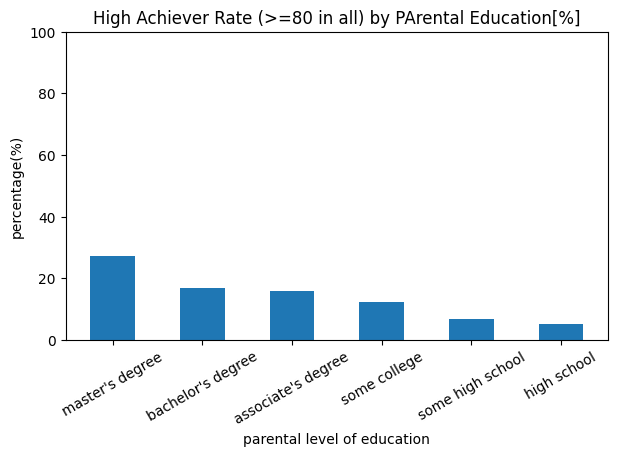

In [6]:
# 라이브러리 import
import pandas as pd      # 데이터 처리 및 분석
import matplotlib.pyplot as plt     # 시각화

# 1. “고득점자” 필터: 세 과목이 모두 ≥ 80
high_df = df.loc[(df['math score']>=80) & (df['reading score']>=80) & (df['writing score']>=80),:]

# 2. 부모 학력 수준별 전체 학생 수(분모)와 고득점자 수(분자) 계산
cnt_student = df.groupby('parental level of education')['math score'].size()
cnt_high_student = high_df.groupby('parental level of education')['math score'].size()

# @. 분모와 분자를 같은 그룹 축으로 맞추기 (분모 = 'cnt_student' / 분자 = 'cnt_high_student')
# 분자는 한 번 필터링을 거친 데이터이기 때문에 빠지는 그룹이 있을 수 있음
# 이 상태에서 바로 비율계산(분모/분자)를 해버리면, 공통으로 존재하는 그룹(index)만 계산됨
# 분모에만 있는 그룹은 아예 제외돼버림
# 때문에, reindex()를 통해 분자의 인덱스를 분모의 인덱스와 통일시킴
cnt_high_student = cnt_high_student.reindex(cnt_student.index).fillna(0)    # 빠진 그룹은 0으로 채움
#이렇게 하면 분모와 분자의 그룹 축이 일치하므로, 모든 그룹에 대해 비율 계산이 가능!

# 3. 비율(%) = (분자 / 분모) × 100 → 소수점 1자리 반올림
rate = (cnt_high_student/cnt_student*100).round(1)

# 4. 내림차순으로 정렬 후 단일 막대그래프 1개로 시각화 (y축 0~100 권장)
sorted_rate = rate.sort_values(ascending=False)
print(sorted_rate)

plt.figure(figsize=(7,4))
plt.bar(sorted_rate.index, sorted_rate, width=0.5)
plt.title('High Achiever Rate (>=80 in all) by PArental Education[%]')
plt.xlabel('parental level of education')
plt.xticks(rotation=30)
plt.ylabel('percentage(%)')
plt.ylim(0,100)

plt.show()

### 문제 8 : 인종/민족 그룹별 읽기 점수 분포 비교(바이올린 플롯)

#### **문제 설명**

각 컬럼 그룹에서 **읽기 점수(`reading score`)의 분포**를 비교하세요.

막대 대신 **바이올린 플롯**을 사용하여, 그룹별 **중앙값과 사분위 범위**를 한눈에 확인하고, **중앙값이 가장 높은 그룹**을 코드로 찾아 출력합니다.

(*바이올린 플롯은 분포의 모양까지 보여주기 때문에 상위권/하위권이 어디에 몰려 있는지 파악하기 쉽습니다.*)

#### **필요 지식**

- `groupby(...).median()`로 그룹별 **중앙값** 계산
- `Series.sort_values()`로 **내림차순 정렬** 및 순서 지정
- **Seaborn `violinplot`** 기본 사용법 (`inner='quartile'` 권장)
- 단일 그래프 기본 서식: 제목/축 라벨/눈금 회전/축 범위

#### **지시 사항**

1. `race/ethnicity`별 **reading score 중앙값**을 계산해 **소수점 1자리**로 반올림하고, **내림차순**으로 정렬해 표로 출력하세요.
2. 위 정렬 순서를 `violinplot`의 **order**로 적용해 **단일 그래프** 1개를 그리세요.
    - x축: `race/ethnicity` (정렬된 순서)
    - y축: `reading score`
    - `inner='quartile'`로 중앙값/사분위선을 표시
    - 제목/축 라벨/라벨 회전(필요 시), y축 범위 `0~100` 권장
3. **중앙값이 가장 높은 그룹명**을 코드로 출력하세요.

#### **시각화 요구**

- 그래프 **1개**(서브플롯 금지)
- 루프(`for p in ax.patches:` 등) 사용 금지
- 제목/축 라벨/라벨 회전/축 범위 정리

#### **채점 포인트**

- 중앙값 계산 및 **내림차순 정렬**을 정확히 수행했는가?
- 정렬된 **order**가 플롯에 반영되었는가?
- `inner='quartile'`로 요약선을 표시했는가?
- **가장 높은 중앙값의 그룹**을 코드로 올바르게 출력했는가?
- 단일 그래프 요건과 기본 서식을 지켰는가?

[Median reading score by race/ethnicity]
race/ethnicity
group E    74.0
group D    71.0
group C    71.0
group B    67.0
group A    64.0
Name: reading score, dtype: float64
Top group by median reading score: group E (74.0)


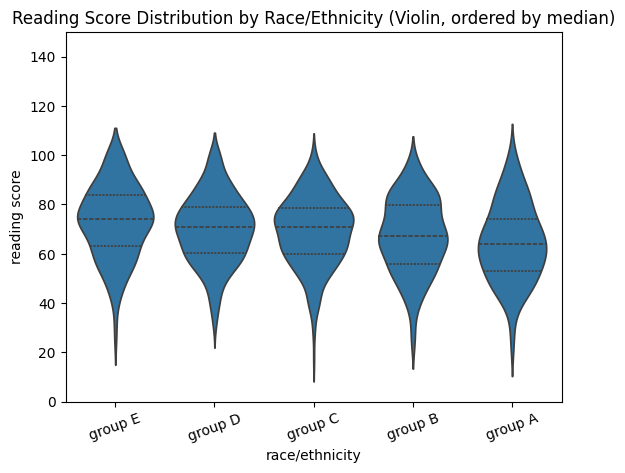

In [ ]:
# 라이브러리 import
import pandas as pd      # 데이터 처리 및 분석
import matplotlib.pyplot as plt     # 시각화
import seaborn as sns       # 시각화

# 1. `race/ethnicity`별 reading score 중앙값을 계산해 소수점 1자리로 반올림하고, 내림차순으로 정렬해 표로 출력하세요.
reading_mid = df.groupby('race/ethnicity')['reading score'].median().round(1).sort_index(ascending=False)
print('[Median reading score by race/ethnicity]')
print(reading_mid)

# 2. 위 정렬 순서를 `violinplot`의 order로 적용해 단일 그래프 1개를 그리세요.
#     - x축: `race/ethnicity` (정렬된 순서)
#     - y축: `reading score`
#     - `inner='quartile'`로 중앙값/사분위선을 표시
#     - 제목/축 라벨/라벨 회전(필요 시), y축 범위 `0~100` 권장
sns.violinplot(x='race/ethnicity', y='reading score', data=df, order= reading_mid.index, inner='quartile')
plt.title('Reading Score Distribution by Race/Ethnicity (Violin, ordered by median)')
plt.xticks(rotation = 20)
plt.ylim(0,150)

plt.show()

# 3. 중앙값이 가장 높은 그룹명을 코드로 출력하세요.
print(f'Top group by median reading score: {reading_mid.index.max()} ({reading_mid.max()})')